In [1]:
import pandas as pd

import pickle
from sklearn.metrics import *
import os
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

## Closed set binary

Train on train set

Grid search on dev set

Evaluation on eval set

In [2]:
result_root_path = '/nas/home/cborrelli/bot_speech/results/closed_set_binary'


In [3]:
nfft_list = [512, 256, 128]
hop_size_list = [256, 128, 64]
selected_features = ['lpc', 'bicoh', 'unet']
selected_features = ['bicoh']
number_lpc_order = 49
stop_lpc_order = 50
normalizers_keys = ["minmax", "zscore"]
classifiers_keys = ["svm", "rf"]


In [4]:
results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])

for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))
                cm_train = confusion_matrix(result_dict['y_train'], result_dict['y_predict_train'],
                                           normalize='true')
                cm_dev = confusion_matrix(result_dict['y_dev'], result_dict['y_predict_dev'],
                                         normalize='true')
                cm_eval = confusion_matrix(result_dict['y_eval'], result_dict['y_predict_eval'],
                                          normalize='true')

                acc_train = balanced_accuracy_score(result_dict['y_train'], result_dict['y_predict_train'])
                acc_dev = balanced_accuracy_score(result_dict['y_dev'], result_dict['y_predict_dev'])
                acc_eval = balanced_accuracy_score(result_dict['y_eval'], result_dict['y_predict_eval'])


                results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                       number_lpc_order, stop_lpc_order,
                                                       n, c, 
                                                       acc_train, acc_dev, acc_eval,
                                                       cm_train, cm_dev, cm_eval, result_dict['best_model']]
                        


In [5]:
len(results_df)

12

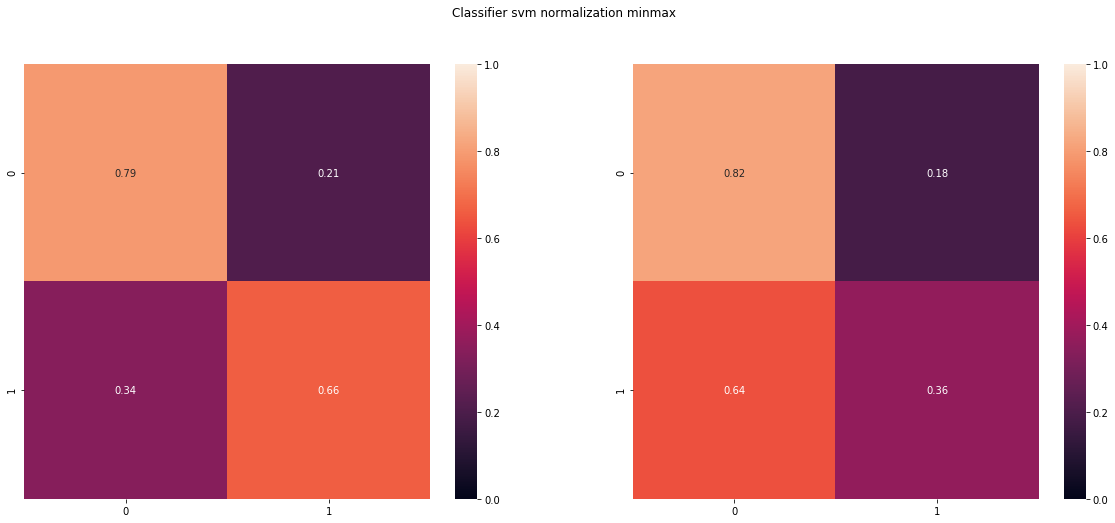

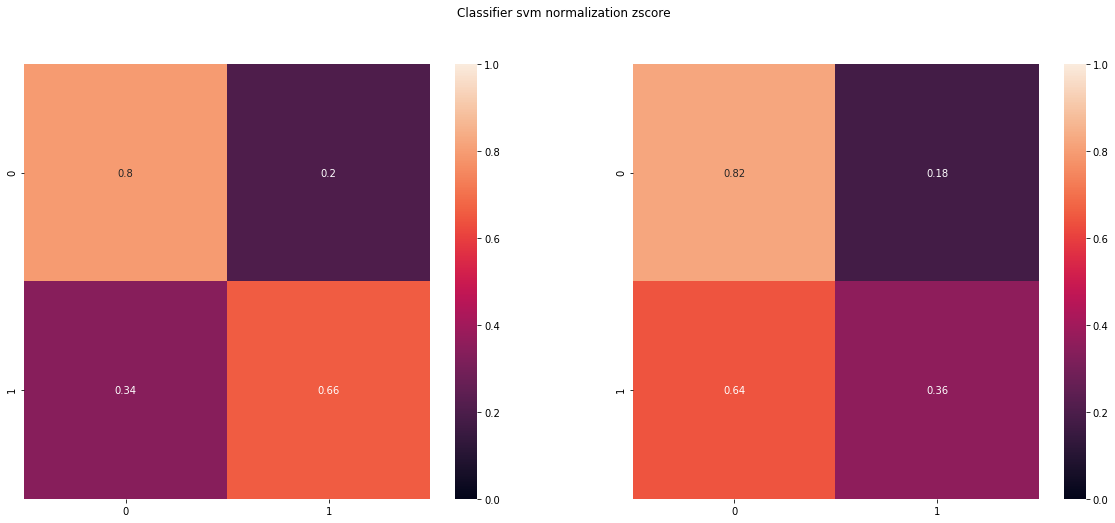

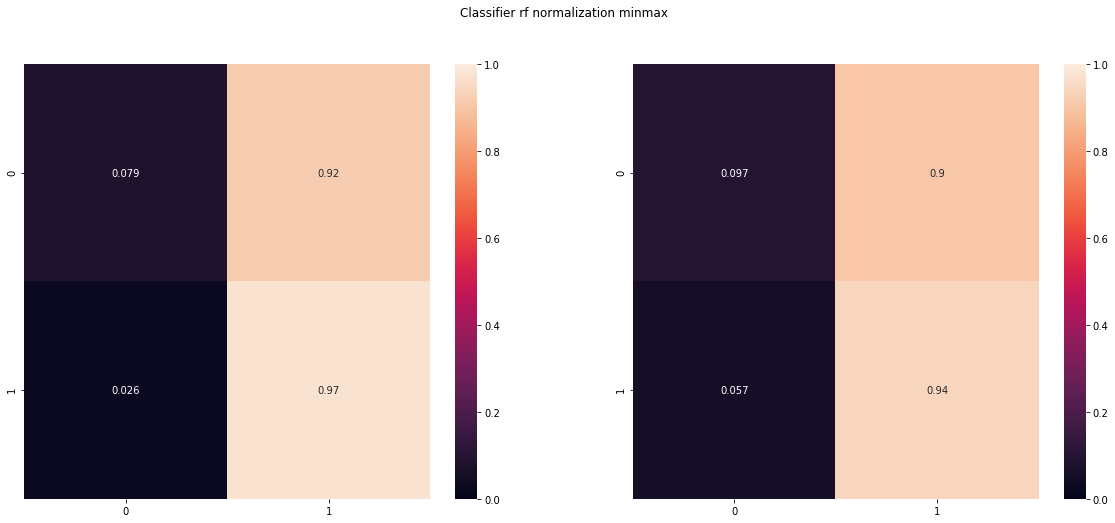

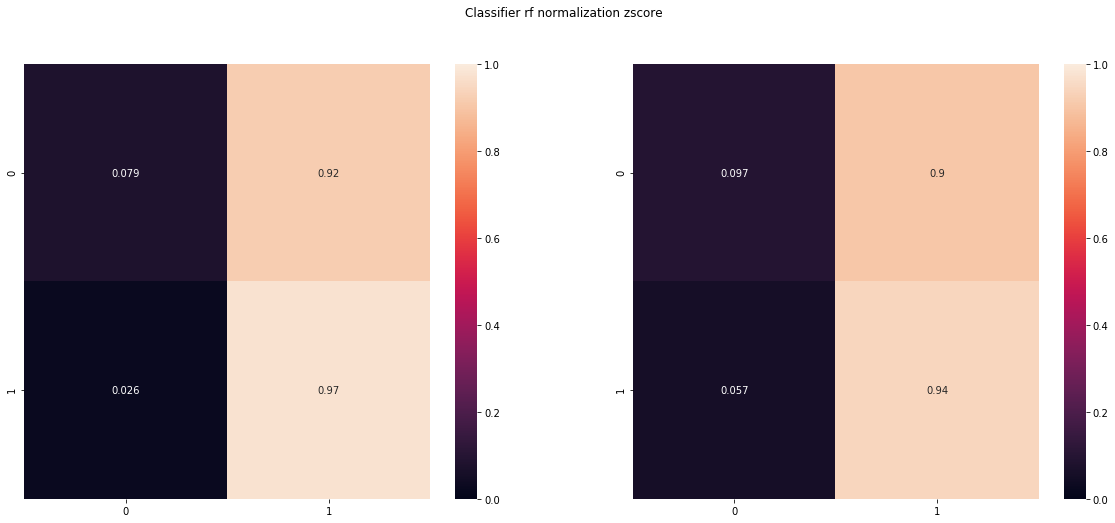

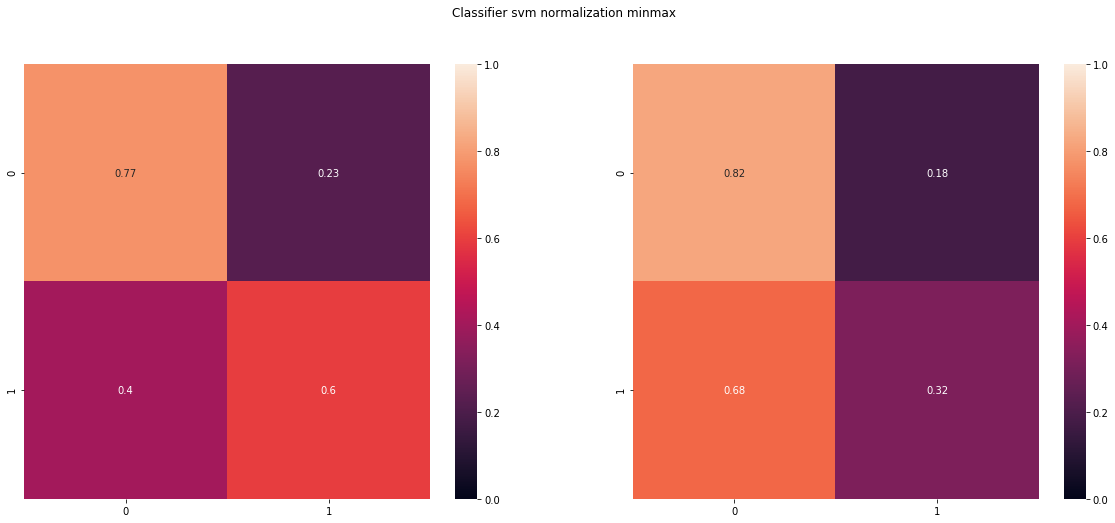

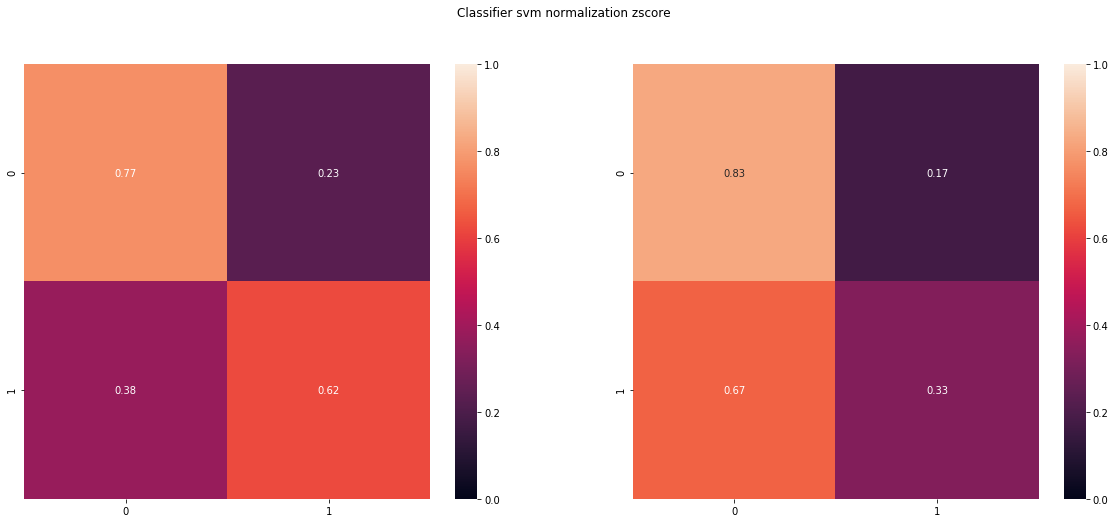

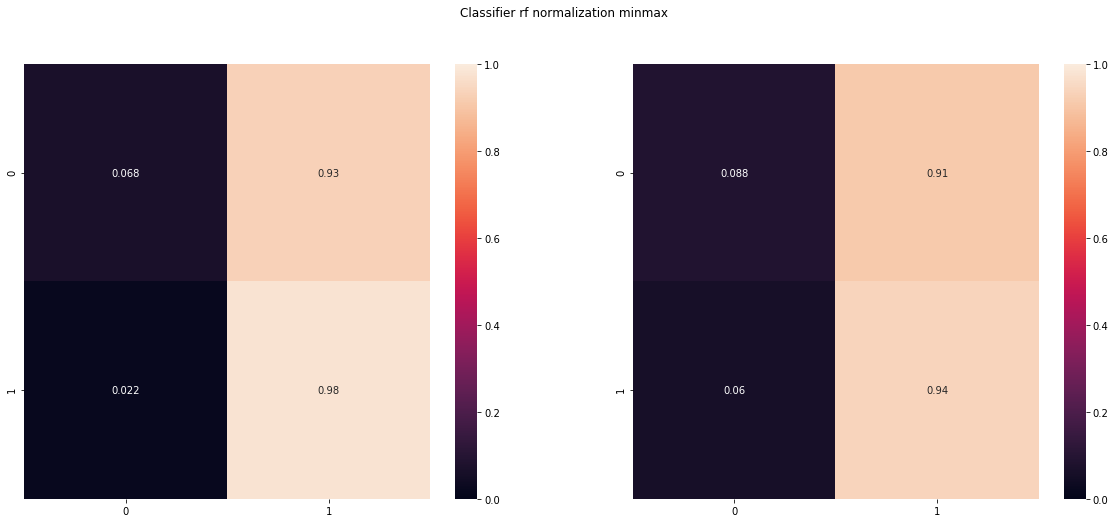

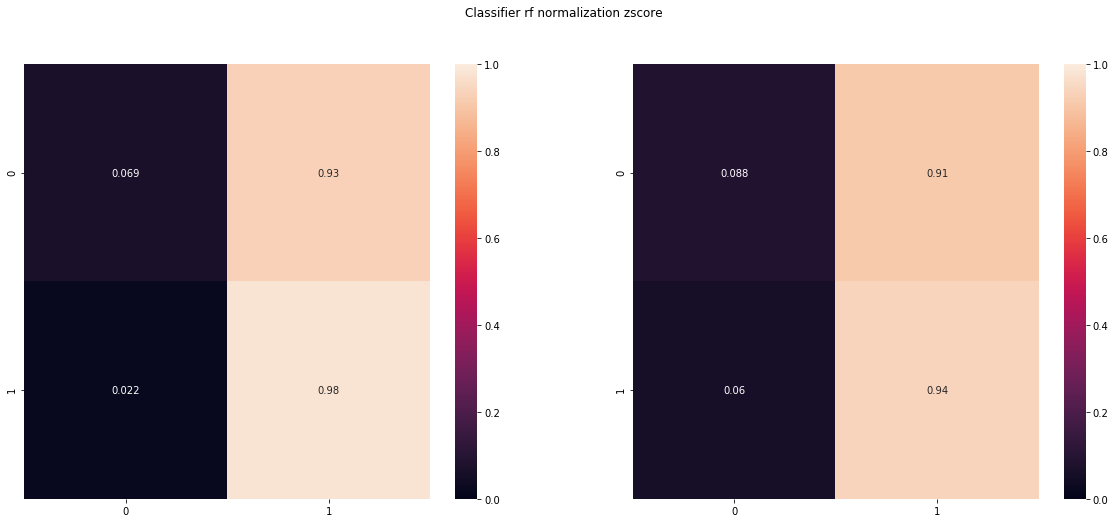

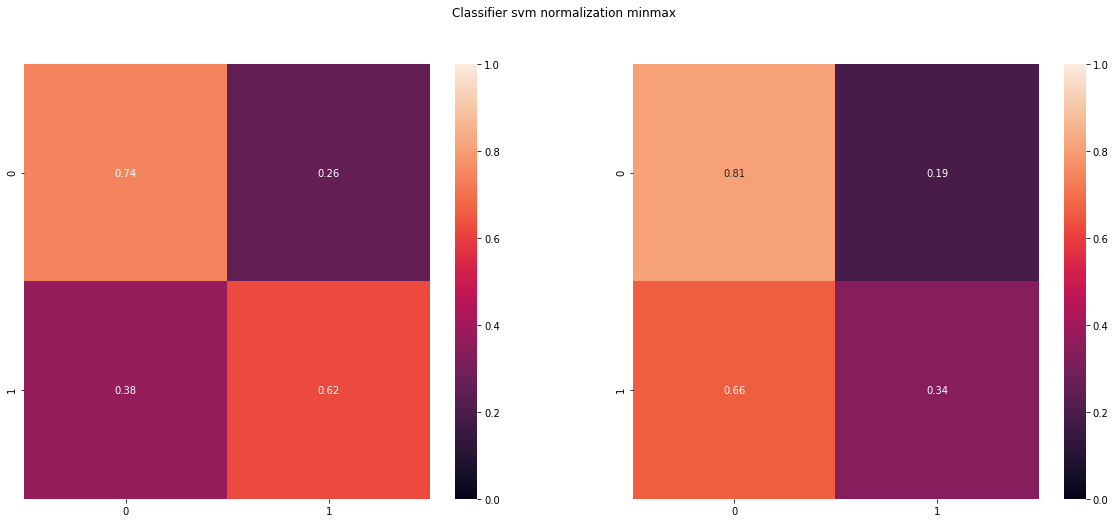

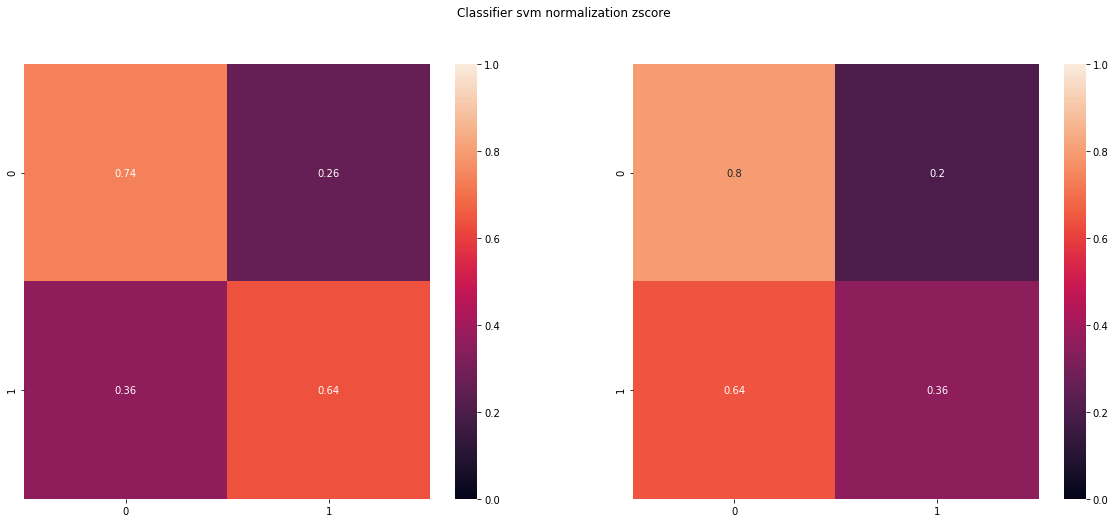

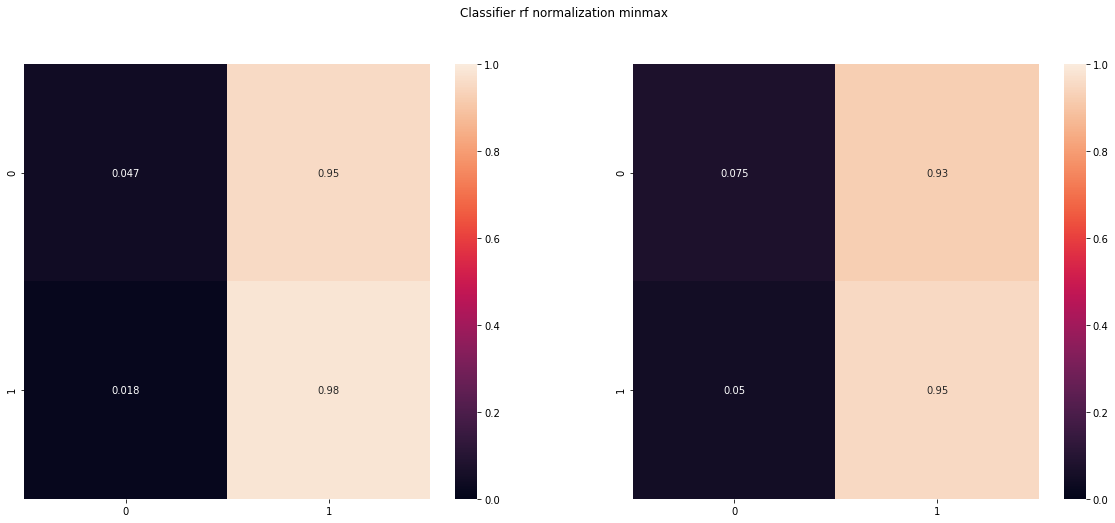

In [6]:
## results_df.sort_values('accuracy_eval', ascending=False, inplace=True)
results_df.reset_index(inplace=True, drop=True)
for index, row in results_df.iterrows():
    if index > 10:
        break
        
    plt.figure(figsize = (20,8))
    plt.suptitle("Classifier {} normalization {}".format(row['classifier'], row['normalization']))

    #plt.subplot(131)
    #sns.heatmap(row['cm_train'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(121)
    sns.heatmap(row['cm_dev'], annot=True, vmin=0, vmax=1)
    
    plt.subplot(122)
    sns.heatmap(row['cm_eval'], annot=True, vmin=0, vmax=1)
    
    plt.show()

In [7]:
results_df.sort_values('accuracy_eval', ascending=False, inplace=True)

for index, row in results_df.iterrows():
    #if row['classifier'] == 'svm':
    if True:
        print("Classifier {} normalization {}".format(row['classifier'], row['normalization']))
        print("Acc train {} Acc dev {} Acc eval {}".format(row['accuracy_train'],
                                                           row['accuracy_dev'],
                                                           row['accuracy_eval']))

Classifier svm normalization minmax
Acc train 0.767469400244798 Acc dev 0.7259214752390979 Acc eval 0.5917242491472476
Classifier svm normalization zscore
Acc train 0.763466952264382 Acc dev 0.72605613413702 Acc eval 0.5895154786045337
Classifier svm normalization zscore
Acc train 0.7627876376988985 Acc dev 0.687488487984413 Acc eval 0.5783446955255771
Classifier svm normalization zscore
Acc train 0.7556267849857201 Acc dev 0.6949681296713436 Acc eval 0.578242626174436
Classifier svm normalization minmax
Acc train 0.7603773969808241 Acc dev 0.6834632606872342 Acc eval 0.5738718168148698
Classifier svm normalization minmax
Acc train 0.7405349857201142 Acc dev 0.6855158847508532 Acc eval 0.5715763477150289
Classifier rf normalization minmax
Acc train 0.8673373113015096 Acc dev 0.5268115195071984 Acc eval 0.519926053966215
Classifier rf normalization zscore
Acc train 0.8673373113015096 Acc dev 0.5268115195071984 Acc eval 0.519926053966215
Classifier rf normalization minmax
Acc train 0.866

In [ ]:
results_df

## Results class by class

In [ ]:
classes_dict = {'-': 0, 'A01': 1, 'A02': 2, 'A03': 3, 'A04': 4, 'A05': 5, 'A06': 6,
                'A07': 7, 'A08': 8, 'A09': 9, 'A10': 10, 'A11': 11, 'A12': 12, 'A13': 13,
                'A14': 14, 'A15': 15, 'A16': 16, 'A17': 17, 'A18': 18, 'A19': 19}

In [ ]:
class_results_df = pd.DataFrame(columns=['nfft', 'hop_size', 'selected_features', 'number_lpc_order', 'stop_lpc_order', 
                                   'normalization', 'classifier', 
                                   'accuracy_train', 'accuracy_dev','accuracy_eval',
                                   'cm_train','cm_dev','cm_eval',
                                   'model_params' ])





for fft_params in zip(nfft_list, hop_size_list):
    nfft = fft_params[0]
    hop_size = fft_params[1]
    for c in classifiers_keys:
        for n in normalizers_keys:
            result_name = "class_{}_norm_{}_nfft_{}_hop-size_{}_numberlpcorder_{}_stoplpcorder_{}".format(
                    c, n, nfft, hop_size,
                    number_lpc_order,
                    stop_lpc_order)

            result_name = result_name + "_selected_features_" + "-".join(
                s for s in selected_features) + ".npy"

            result_filename = os.path.join(result_root_path, result_name)

            if os.path.exists(result_filename):
                result_dict = pickle.load(open(result_filename, "rb" ))

                for key_alg in class_dict:
                
                y_predict_eval = result_dict['y_predict_eval']
                y_eval = result_dict['y_eval']
                y_eval_orig = result_dict['y_eval_orig']
                
                

                selected_indexes = [a or b for a, b in zip(y_eval_orig == unknown_dict[key_orig], y_eval_orig == 0)]

                y_predict_eval = y_predict_eval[selected_indexes]
                y_eval = y_eval[selected_indexes]

                cm_eval = confusion_matrix(y_eval, y_predict_eval, normalize='true')
                acc_eval = balanced_accuracy_score(y_eval, y_predict_eval)
                        
                
                
                
                


                class_results_df.loc[len(results_df.index)] = [nfft, hop_size, selected_features, 
                                                       number_lpc_order, stop_lpc_order,
                                                       n, c, 
                                                       acc_train, acc_dev, acc_eval,
                                                       cm_train, cm_dev, cm_eval, result_dict['best_model']]